# Análisis de datos level 2

In [1]:
# Necesitamos pandas, pandas data reader 
# Debemos saber cómo extraer la data de world bank con
# los códigos de países y los códigos de los indicadores

In [2]:
co2 = 'EN.ATM.CO2E.KT'
inflation = 'NY.GDP.DEFL.KD.ZG'
gdp = 'NY.GDP.MKTP.CD' #current US$
unemployment = 'SL.UEM.TOTL.ZS' # % of total labor force
gini = 'SI.POV.GINI'
cel_subs = 'IT.CEL.SETS.P2'
col_names = ['co2','inflation','gdp','unemployment','gini','cell_subs']

In [3]:
import pandas as pd
from pandas_datareader import wb

In [4]:
!pip install pandas-datareader

In [5]:
data = wb.download(indicator = [co2, inflation, gdp, unemployment, gini, cel_subs],
           country = ['PER','CL','VE'], start=1950, end=2020)
data

EN.ATM.CO2E.KT  NY.GDP.DEFL.KD.ZG  NY.GDP.MKTP.CD  \
country       year                                                      
Chile         2020             NaN                NaN             NaN   
              2019             NaN           2.668611    2.823182e+11   
              2018             NaN           2.360479    2.982580e+11   
              2017             NaN           4.782014    2.770450e+11   
              2016       85822.468           4.469919    2.504401e+11   
...                            ...                ...             ...   
Venezuela, RB 1964       56603.812          -0.366503    8.099318e+09   
              1963       56204.109           4.919830    9.753333e+09   
              1962       54106.585           0.665054    8.946970e+09   
              1961       51928.387           2.013731    8.189091e+09   
              1960       57069.521                NaN    7.779091e+09   

                    SL.UEM.TOTL.ZS  SI.POV.GINI  IT.CEL.SETS.P2  
country       year                                               
Chile         2020           7.096          NaN             NaN  
              2019           7.090          NaN         132.185  
              2018           7.233          NaN         134.437  
              2017           6.958         44.4         124.594  
              2016           6.738          NaN         127.973  
...                            ...          ...             ...  
Venezuela, RB 1964             NaN          NaN             NaN  
              1963             NaN          NaN             NaN  
              1962             NaN          NaN             NaN  
              1961             NaN          NaN             NaN  
              1960             NaN          NaN           0.000  

[183 rows x 6 columns]

In [6]:
data.columns = col_names
data

co2  inflation           gdp  unemployment  gini  \
country       year                                                           
Chile         2020        NaN        NaN           NaN         7.096   NaN   
              2019        NaN   2.668611  2.823182e+11         7.090   NaN   
              2018        NaN   2.360479  2.982580e+11         7.233   NaN   
              2017        NaN   4.782014  2.770450e+11         6.958  44.4   
              2016  85822.468   4.469919  2.504401e+11         6.738   NaN   
...                       ...        ...           ...           ...   ...   
Venezuela, RB 1964  56603.812  -0.366503  8.099318e+09           NaN   NaN   
              1963  56204.109   4.919830  9.753333e+09           NaN   NaN   
              1962  54106.585   0.665054  8.946970e+09           NaN   NaN   
              1961  51928.387   2.013731  8.189091e+09           NaN   NaN   
              1960  57069.521        NaN  7.779091e+09           NaN   NaN   

                    cell_subs  
country       year             
Chile         2020        NaN  
              2019    132.185  
              2018    134.437  
              2017    124.594  
              2016    127.973  
...                       ...  
Venezuela, RB 1964        NaN  
              1963        NaN  
              1962        NaN  
              1961        NaN  
              1960      0.000  

[183 rows x 6 columns]

# Exploración de datos

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 183 entries, ('Chile', '2020') to ('Venezuela, RB', '1960')
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   co2           171 non-null    float64
 1   inflation     172 non-null    float64
 2   gdp           175 non-null    float64
 3   unemployment  90 non-null     float64
 4   gini          49 non-null     float64
 5   cell_subs     144 non-null    float64
dtypes: float64(6)
memory usage: 11.7+ KB


In [9]:
pd.options.display.float_format='{:,.2f}'.format

In [10]:
data.describe()

,co2,inflation,gdp,unemployment,gini,cell_subs
count,171.00,172.00,175.00,90.00,49.00,144.00
mean,"60,677.08",87.60,"78,678,166,775.76",7.29,49.35,33.81
std,"50,214.80",518.63,"94,384,264,341.28",3.06,4.41,47.01
min,"8,173.74",-1.18,"2,571,908,062.08",2.96,42.50,0.00
25%,"22,810.57",4.28,"13,970,310,347.13",5.51,45.50,0.00
50%,"46,816.59",12.43,"45,964,327,558.88",6.93,49.80,1.58
75%,"77,835.74",34.20,"92,112,395,583.41",8.97,53.10,74.05
max,"193,316.91","6,261.24","482,359,318,767.70",16.78,57.20,137.59


In [11]:
data['gdp'].groupby(level=0).describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Chile,60.00,"81,362,448,047.40","93,083,928,209.98","4,110,000,000.00","13,435,624,393.08","33,811,882,930.78","105,148,997,654.73","298,258,019,275.05"
Peru,60.00,"59,260,368,566.87","68,005,465,326.36","2,571,908,062.08","13,517,775,813.93","24,454,972,877.70","69,091,679,138.33","226,848,050,819.52"
"Venezuela, RB",55.00,"96,932,912,525.50","115,838,657,549.71","7,779,090,909.09","21,568,255,813.95","60,065,011,013.22","95,435,236,990.49","482,359,318,767.70"


In [12]:
data['co2'].groupby(level=0).describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Chile,57.00,"40,159.57","22,383.76","13,490.89","22,555.72","28,191.90","58,815.01","85,822.47"
Peru,57.00,"26,378.66","12,716.33","8,173.74","19,757.80","23,340.46","28,723.61","58,066.94"
"Venezuela, RB",57.00,"115,493.00","48,037.28","51,928.39","66,501.04","109,529.62","164,380.61","193,316.91"


In [14]:
for indicator in col_names:
    print('Indicador: ' + indicator)
    print(data[indicator].groupby(level=0).describe())
    print('*********************************************')

Indicador: co2
               count       mean       std       min       25%        50%  \
country                                                                    
Chile          57.00  40,159.57 22,383.76 13,490.89 22,555.72  28,191.90   
Peru           57.00  26,378.66 12,716.33  8,173.74 19,757.80  23,340.46   
Venezuela, RB  57.00 115,493.00 48,037.28 51,928.39 66,501.04 109,529.62   

                     75%        max  
country                              
Chile          58,815.01  85,822.47  
Peru           28,723.61  58,066.94  
Venezuela, RB 164,380.61 193,316.91  
*********************************************
Indicador: inflation
               count   mean    std   min  25%   50%   75%      max
country                                                           
Chile          59.00  46.38 112.27 -0.05 4.62 12.95 32.22   678.61
Peru           59.00 188.25 874.06  0.11 3.09  9.32 42.16 6,261.24
Venezuela, RB  54.00  22.68  22.67 -1.18 5.21 18.20 33.72   115.52
************

# Gráficos
## Líneas de tiempo

<AxesSubplot:xlabel='year'>

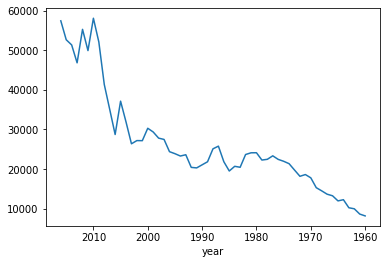

In [21]:
data.xs('Peru')['co2'].plot()

In [22]:
data.reset_index(inplace=True)
data

,country,year,co2,inflation,gdp,unemployment,gini,cell_subs
0,Chile,2020,NaN,NaN,NaN,7.10,NaN,NaN
1,Chile,2019,NaN,2.67,"282,318,159,744.65",7.09,NaN,132.19
2,Chile,2018,NaN,2.36,"298,258,019,275.05",7.23,NaN,134.44
3,Chile,2017,NaN,4.78,"277,044,950,259.01",6.96,44.40,124.59
4,Chile,2016,"85,822.47",4.47,"250,440,136,356.13",6.74,NaN,127.97
...,...,...,...,...,...,...,...,...
178,"Venezuela, RB",1964,"56,603.81",-0.37,"8,099,318,181.82",NaN,NaN,NaN
179,"Venezuela, RB",1963,"56,204.11",4.92,"9,753,333,333.33",NaN,NaN,NaN
180,"Venezuela, RB",1962,"54,106.58",0.67,"8,946,969,696.97",NaN,NaN,NaN
181,"Venezuela, RB",1961,"51,928.39",2.01,"8,189,090,909.09",NaN,NaN,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       183 non-null    object 
 1   year          183 non-null    object 
 2   co2           171 non-null    float64
 3   inflation     172 non-null    float64
 4   gdp           175 non-null    float64
 5   unemployment  90 non-null     float64
 6   gini          49 non-null     float64
 7   cell_subs     144 non-null    float64
dtypes: float64(6), object(2)
memory usage: 11.6+ KB


In [24]:
data['year'] = pd.to_datetime(data['year'], format='%Y')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   country       183 non-null    object        
 1   year          183 non-null    datetime64[ns]
 2   co2           171 non-null    float64       
 3   inflation     172 non-null    float64       
 4   gdp           175 non-null    float64       
 5   unemployment  90 non-null     float64       
 6   gini          49 non-null     float64       
 7   cell_subs     144 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.6+ KB


In [28]:
data['date'] = data['year'].dt.year

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   country       183 non-null    object        
 1   year          183 non-null    datetime64[ns]
 2   co2           171 non-null    float64       
 3   inflation     172 non-null    float64       
 4   gdp           175 non-null    float64       
 5   unemployment  90 non-null     float64       
 6   gini          49 non-null     float64       
 7   cell_subs     144 non-null    float64       
 8   date          183 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 13.0+ KB


In [32]:
data_co2 = data.pivot_table(values='co2', index='date', columns = 'country')


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

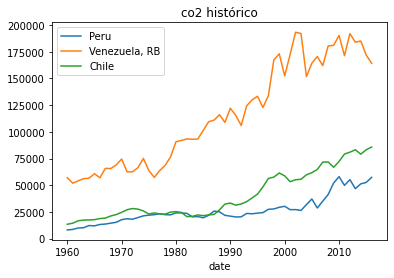

In [39]:
data_co2.Peru.plot()
data_co2['Venezuela, RB'].plot()
data_co2.Chile.plot()
plt.legend()
plt.title('co2 histórico');

<AxesSubplot:>

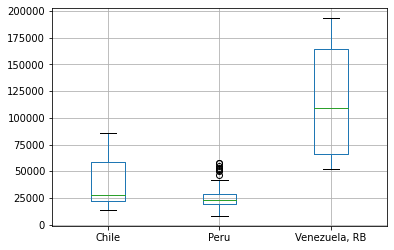

In [40]:
data_co2.boxplot()

In [45]:
def plotting_hitorical(data, indicador):
    data_indicador = data.pivot_table(values=indicador, index='date',columns='country')
    # graph 1
    data_indicador.Peru.plot()
    data_indicador['Venezuela, RB'].plot()
    data_indicador.Chile.plot()
    plt.legend()
    plt.title(indicador + ' histórico');

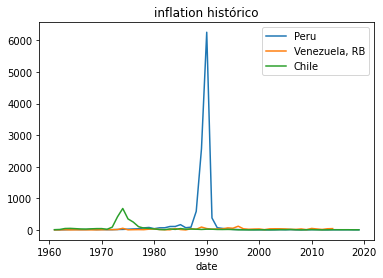

In [46]:
plotting_hitorical(data, 'inflation')

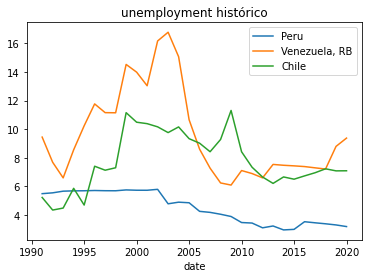

In [48]:
plotting_hitorical(data, 'unemployment')

In [49]:
def plotting_boxplot(data, indicador):
    data_indicador = data.pivot_table(values=indicador, index='date',columns='country')
    
    data_indicador.boxplot()
    plt.title(indicador)

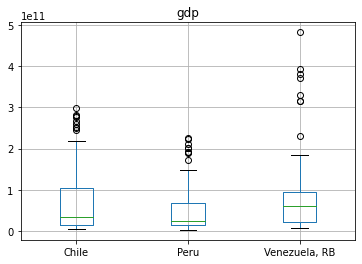

In [50]:
plotting_boxplot(data, 'gdp')

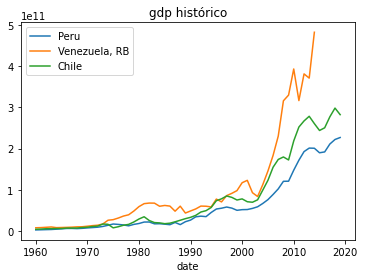

In [51]:
plotting_hitorical(data, 'gdp')

In [53]:
data.groupby('country')['gdp'].count()

country
Chile            60
Peru             60
Venezuela, RB    55
Name: gdp, dtype: int64

In [56]:
data[data['country'] == 'Venezuela, RB'].head(10)

,country,year,co2,inflation,gdp,unemployment,gini,cell_subs,date
122,"Venezuela, RB",2020-01-01,NaN,NaN,NaN,9.38,NaN,NaN,2020
123,"Venezuela, RB",2019-01-01,NaN,NaN,NaN,8.80,NaN,58.07,2019
124,"Venezuela, RB",2018-01-01,NaN,NaN,NaN,7.22,NaN,71.77,2018
125,"Venezuela, RB",2017-01-01,NaN,NaN,NaN,7.30,NaN,85.33,2017
126,"Venezuela, RB",2016-01-01,"164,175.26",NaN,NaN,7.39,NaN,92.46,2016
127,"Venezuela, RB",2015-01-01,"171,894.29",NaN,NaN,7.44,NaN,96.71,2015
128,"Venezuela, RB",2014-01-01,"185,113.83",40.44,"482,359,318,767.70",7.48,NaN,101.61,2014
129,"Venezuela, RB",2013-01-01,"183,944.05",35.50,"371,005,379,786.57",7.54,NaN,103.74,2013
130,"Venezuela, RB",2012-01-01,"192,040.79",14.06,"381,286,237,847.67",6.60,NaN,104.11,2012
131,"Venezuela, RB",2011-01-01,"171,362.58",28.15,"316,482,190,800.36",6.90,NaN,99.63,2011


In [67]:
data.drop('gini', axis=1, inplace=True)

In [68]:
data

,country,year,co2,inflation,gdp,unemployment,cell_subs,date
0,Chile,2020-01-01,NaN,NaN,NaN,7.10,NaN,2020
1,Chile,2019-01-01,NaN,2.67,"282,318,159,744.65",7.09,132.19,2019
2,Chile,2018-01-01,NaN,2.36,"298,258,019,275.05",7.23,134.44,2018
3,Chile,2017-01-01,NaN,4.78,"277,044,950,259.01",6.96,124.59,2017
4,Chile,2016-01-01,"85,822.47",4.47,"250,440,136,356.13",6.74,127.97,2016
...,...,...,...,...,...,...,...,...
178,"Venezuela, RB",1964-01-01,"56,603.81",-0.37,"8,099,318,181.82",NaN,NaN,1964
179,"Venezuela, RB",1963-01-01,"56,204.11",4.92,"9,753,333,333.33",NaN,NaN,1963
180,"Venezuela, RB",1962-01-01,"54,106.58",0.67,"8,946,969,696.97",NaN,NaN,1962
181,"Venezuela, RB",1961-01-01,"51,928.39",2.01,"8,189,090,909.09",NaN,NaN,1961


In [69]:
data.corr()

,co2,inflation,gdp,unemployment,cell_subs,date
co2,1.00,-0.10,0.65,0.57,0.41,0.51
inflation,-0.10,1.00,-0.09,0.10,-0.11,-0.02
gdp,0.65,-0.09,1.00,-0.12,0.89,0.80
unemployment,0.57,0.10,-0.12,1.00,-0.24,-0.22
cell_subs,0.41,-0.11,0.89,-0.24,1.00,0.81
date,0.51,-0.02,0.80,-0.22,0.81,1.00


In [70]:
import seaborn as sns

<AxesSubplot:>

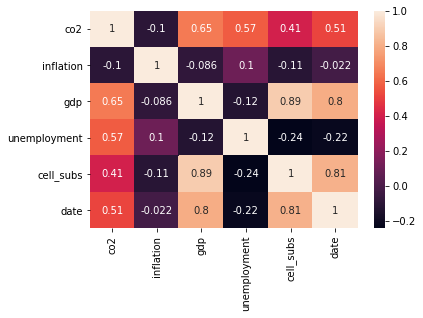

In [72]:
sns.heatmap(data.corr(), annot=True)

In [74]:
global_indicators = data.groupby('date').median()
global_indicators

,co2,inflation,gdp,unemployment,cell_subs
date,,,,,
1960,"13,490.89",NaN,"4,110,000,000.00",NaN,0.00
1961,"14,473.65",3.10,"4,609,727,272.73",NaN,NaN
1962,"16,725.19",3.01,"5,416,272,727.27",NaN,NaN
1963,"17,355.91",5.01,"5,668,187,500.00",NaN,NaN
1964,"17,524.59",13.56,"5,982,347,826.09",NaN,NaN
...,...,...,...,...,...
2016,"85,822.47",3.78,"221,168,040,090.01",6.74,119.42
2017,NaN,4.20,"244,026,078,871.26",6.96,123.76
2018,NaN,2.19,"260,151,494,880.63",7.22,123.76


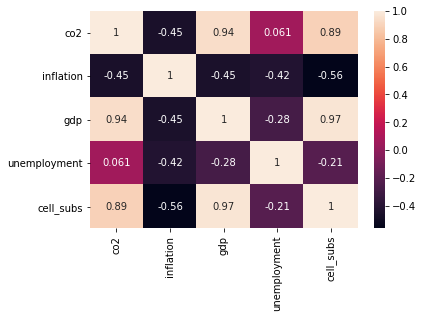

In [76]:
sns.heatmap(global_indicators.corr(), annot=True);

<AxesSubplot:xlabel='date'>

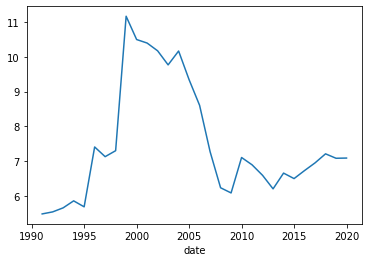

In [79]:
global_indicators.unemployment.plot()

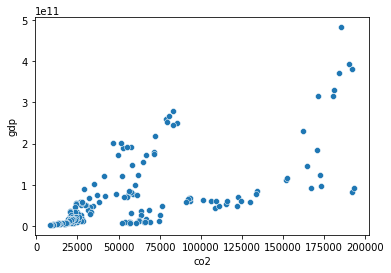

In [85]:
sns.scatterplot(x=data.co2, y=data.gdp);

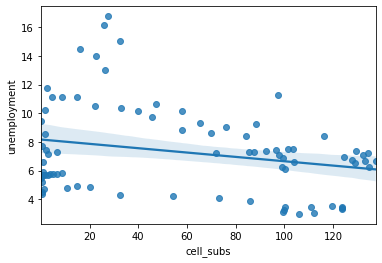

In [88]:
sns.regplot(x=data.cell_subs, y=data.unemployment);

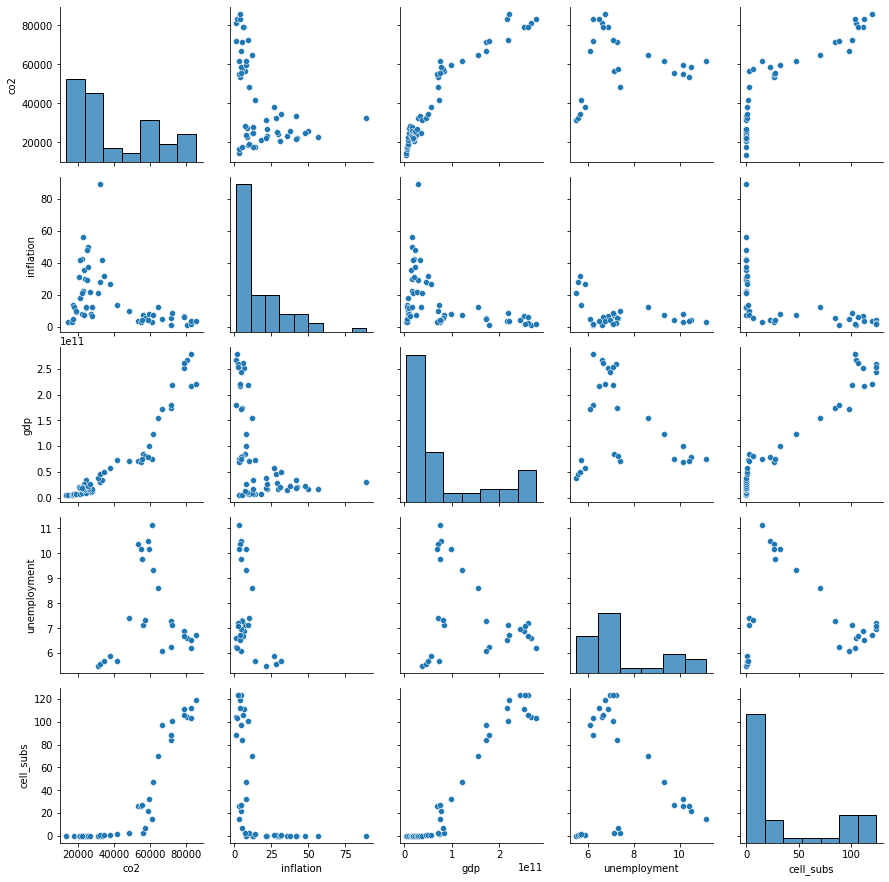

In [87]:
g = sns.PairGrid(global_indicators)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);